# Visibility

In [19]:
from ContrastVisibilityProject_Lucas.ImageProcessing.ImageAnalyzer import ImageAnalyzer, GRADIENT

In [20]:
from ContrastVisibilityProject_Lucas.ImageProcessing.ConvolutionFilter import Filter
from ContrastVisibilityProject_Lucas.Parameters import WEIGHT_LIST, SIGMA_LIST

sdog_filter = Filter(distance_from_screen=50,
                         sigma_list=SIGMA_LIST,
                         weight_list=WEIGHT_LIST)
analyzer = ImageAnalyzer(sdog_filter)

In [27]:
from ContrastVisibilityProject_Lucas.ImageProcessing.ImageGenerator import Image

# Load image
file = "RGB_002"
img = Image()
img.load_image(f"DexiNed/BIPEDv2/BIPED/edges/imgs/train/rgbr/real/{file}.jpg")
# analyse and calculate
img.convert_into_linear_space()
analyzer.generate_visibility_map(img, method=GRADIENT)
print(analyzer.visibility_map)

[[ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ... 28.498285 32.368244  0.      ]
 [ 0.        0.        0.       ... 25.877457  0.        0.      ]
 ...
 [ 0.       20.121693 13.871918 ...  0.        0.        0.      ]
 [ 0.        0.        0.       ... 97.89399  86.52909   0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]]


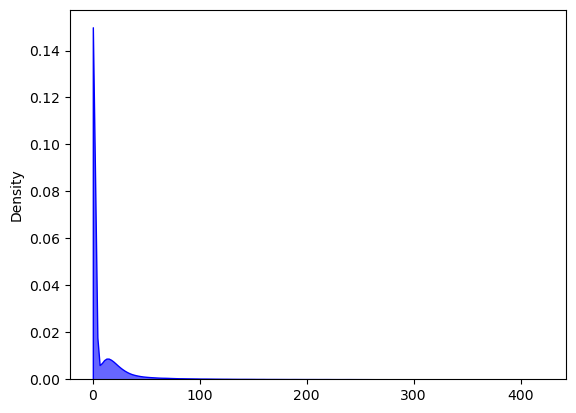

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(map.flatten(), clip=(map.min(), map.max()), fill=True, color="blue", alpha=0.6)
plt.show()

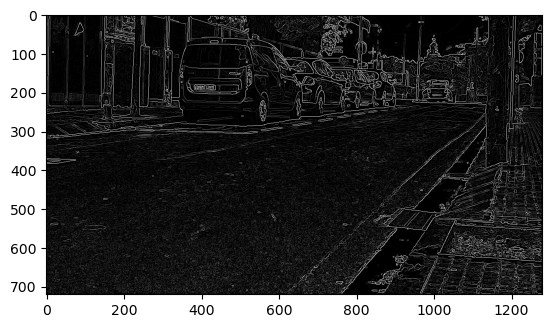

In [80]:
import matplotlib.pyplot as plt
import numpy as np

def normalisation(img):
    res = img / np.percentile(img, 98)
    res = np.where(res<0, 0, res)
    res = np.where(res>1, 1, res)
    return res

plt.imshow(normalisation(analyzer.visibility_map), cmap="gray")
plt.show()